In [1]:
import jupyter_black

jupyter_black.load()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

from sklearn.model_selection import train_test_split

In [3]:
def construct_matrix(x, y):
    return np.hstack([x.reshape((x.shape[0], 1)), y.reshape(y.shape[0], 1)])

In [4]:
x = np.array([1, 3, 5, 7])
y = np.array([2, 4, 6, 8])

In [5]:
construct_matrix(x, y)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [6]:
construct_matrix(np.array([1, 2]), np.array([3, 4]))

array([[1, 3],
       [2, 4]])

**2.** Реализуйте функцию, принимающую на вход массив целых неотрицательных чисел `nums` и возвращающую самый частый элемент массива.

In [6]:
def most_frequent(nums):
    """
    Find the most frequent value in an array
    :param nums: array of ints
    :return: the most frequent value
    """
    uniques = np.unique(np.array(nums), return_counts=True)
    return uniques[0][np.argmax(uniques[1])]

In [7]:
nums = [1, 2, 4, 6, 2, 1, 1, 3, 5, 2, 8, 5, 6, 6]

In [8]:
most_frequent(nums)

1

In [83]:
import platform

if platform.system() == "Windows":
    tables = "data\\"
else:
    tables = "data/"

In [84]:
data = pd.read_csv(tables + "organisations.csv")
features = pd.read_csv(tables + "features.csv")
rubrics = pd.read_csv(tables + "rubrics.csv")

In [5]:
data.head()

,org_id,city,average_bill,rating,rubrics_id,features_id
0,15903868628669802651,msk,1500.0,4.270968,30776 30774,3501685156 3501779478 20422 3502045016 3502045...
1,16076540698036998306,msk,500.0,4.375000,30771,1509 1082283206 273469383 10462 11617 35017794...
2,8129364761615040323,msk,500.0,4.000000,31495,10462 11177 11617 11629 1416 1018 11704 11867 ...
3,15262729117594253452,msk,500.0,4.538813,30776 30770,3501618484 2020795524 11629 11617 1018 11704 2...
4,13418544315327784420,msk,500.0,4.409091,31495,11617 10462 11177 1416 11867 3501744275 20282 ...


In [7]:
rubrics_dict = dict(zip(rubrics["rubric_id"], rubrics["rubric_name"]))
rubrics_dict

{30519: 'Булочная, пекарня',
 30770: 'Бар, паб',
 30771: 'Быстрое питание',
 30774: 'Кафе',
 30775: 'Пиццерия',
 30776: 'Ресторан',
 30777: 'Столовая',
 31286: 'Спортбар',
 31350: 'Кондитерская',
 31375: 'Суши-бар',
 31401: 'Кальян-бар',
 31495: 'Кофейня',
 3108292683: 'Бар безалкогольных напитков',
 3501514558: 'Фудкорт',
 3501750896: 'Кофе с собой'}

In [18]:
print(
    data.isna().value_counts(subset=["average_bill"])[True],
    data.isna().value_counts(subset=["average_bill"])[False],
)
# data.dropna(subset=['average_bill'])

35561 32778


In [85]:
data.dropna(subset=["average_bill"], inplace=True)
data.value_counts(subset=["average_bill"])

average_bill
500.0           22329
1000.0           5482
1500.0           2696
2000.0           1184
2500.0            445
                ...  
203500.0            1
246000.0            1
250000.0            1
500000.0            1
7502000.0           1
Name: count, Length: 63, dtype: int64

In [86]:
data = data[data.average_bill <= 2500]

In [21]:
data.value_counts(subset=["average_bill"]).index[0]

(500.0,)

In [10]:
data.shape[0]

32136

In [11]:
data[["rubrics_id", "features_id"]] = data[["rubrics_id", "features_id"]].map(
    lambda x: x.split(" ")
)

In [12]:
data.head()

,org_id,city,average_bill,rating,rubrics_id,features_id
0,15903868628669802651,msk,1500.0,4.270968,"[30776, 30774]","[3501685156, 3501779478, 20422, 3502045016, 35..."
1,16076540698036998306,msk,500.0,4.375000,[30771],"[1509, 1082283206, 273469383, 10462, 11617, 35..."
2,8129364761615040323,msk,500.0,4.000000,[31495],"[10462, 11177, 11617, 11629, 1416, 1018, 11704..."
3,15262729117594253452,msk,500.0,4.538813,"[30776, 30770]","[3501618484, 2020795524, 11629, 11617, 1018, 1..."
4,13418544315327784420,msk,500.0,4.409091,[31495],"[11617, 10462, 11177, 1416, 11867, 3501744275,..."


In [14]:
data[(data.city == "msk")].value_counts(subset=["average_bill"])

average_bill
500.0           13761
1000.0           3716
1500.0           2088
2000.0            962
2500.0            365
Name: count, dtype: int64

In [24]:
data[(data.city == 'spb')].value_counts(subset=['average_bill'])

average_bill
500.0           8568
1000.0          1766
1500.0           608
2000.0           222
2500.0            80
Name: count, dtype: int64

In [13]:
mask_cafe = data["rubrics_id"].map(lambda x: "30774" in x)

np.round(
    data[mask_cafe & (data.city == "msk")]["average_bill"].mean()
    - data[mask_cafe & (data.city == "spb")]["average_bill"].mean()
)

142.0

In [27]:
bilrating = data.dropna(subset="rating")[["average_bill", "rating"]]
print(
    bilrating[bilrating.average_bill == 500]["rating"].median(),
    bilrating[bilrating.average_bill == 1000]["rating"].median(),
    bilrating[bilrating.average_bill == 1500]["rating"].median(),
    bilrating[bilrating.average_bill == 2000]["rating"].median(),
    bilrating[bilrating.average_bill == 2500]["rating"].median(),
)

4.2 4.304347826086956 4.325581395348837 4.378125217028961 4.415954415954416


(array([  3.,   0.,   1.,   2.,   0.,   7.,  16.,  57., 200.,  75.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

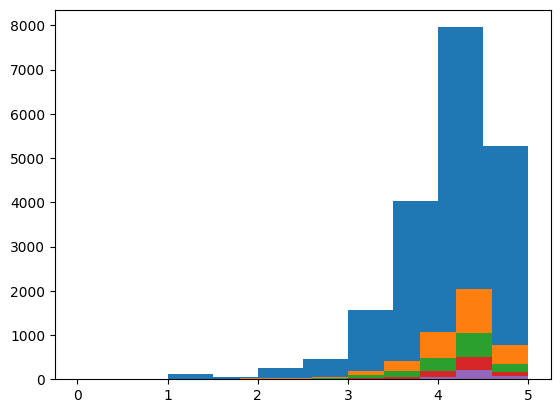

In [28]:
ax = [plt.figure().add_subplot()] * 5

bilrating = data.dropna(subset="rating")[["average_bill", "rating"]]
ax[0].hist(bilrating[bilrating.average_bill == 500]["rating"])
ax[1].hist(bilrating[bilrating.average_bill == 1000]["rating"])
ax[2].hist(bilrating[bilrating.average_bill == 1500]["rating"])
ax[3].hist(bilrating[bilrating.average_bill == 2000]["rating"])
ax[4].hist(bilrating[bilrating.average_bill == 2500]["rating"])

In [29]:
mask_pub = data["rubrics_id"].map(lambda x: "30770" in x)

np.round(data[mask_pub]["average_bill"].mean() - data[mask_cafe]["average_bill"].mean())

82.0

In [87]:
clean_data_train, clean_data_test = train_test_split(
    data, stratify=data["average_bill"], test_size=0.33, random_state=42
)

In [88]:
clean_data_test.shape[0]

10605

In [89]:
from sklearn.base import RegressorMixin


class MeanRegressor(RegressorMixin):
    # Predicts the mean of y_train
    def fit(self, X=None, y=None):
        """
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Training data features
        y : array like, shape = (n_samples,)
        Training data targets
        """
        self.mean = y.mean()

    def predict(self, X=None):
        """
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Data to predict
        """
        return self.mean * np.ones((X.shape[0], 1))

In [90]:
from scipy.stats import mode
from sklearn.base import ClassifierMixin


class MostFrequentClassifier(ClassifierMixin):
    # Predicts the rounded (just in case) median of y_train
    def fit(self, X=None, y=None):
        """
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Training data features
        y : array like, shape = (n_samples,)
        Training data targets
        """
        self.mostFrequent = mode(y)[0]

    def predict(self, X=None):
        """
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Data to predict
        """
        return self.mostFrequent * np.ones((X.shape[0], 1))

In [91]:
reg = MeanRegressor()
reg.fit(y=clean_data_train["average_bill"])

In [92]:
clf = MostFrequentClassifier()
clf.fit(y=clean_data_train["average_bill"])

In [93]:
reg.mean

752.1016209186754

In [94]:
clf.mostFrequent

500.0

In [95]:
def RMSE(data_test, model, target_test="average_bill"):
    return np.sqrt(
        sklearn.metrics.mean_squared_error(
            data_test[target_test], model.predict(data_test)
        )
    )

In [96]:
print(RMSE(clean_data_test, reg, target_test="average_bill"))

448.7143889551622


In [97]:
sklearn.metrics.balanced_accuracy_score(
    clf.predict(clean_data_test), clean_data_test["average_bill"]
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.6947666195190948

In [98]:
from sklearn.base import RegressorMixin


class CityMeanRegressor(RegressorMixin):
    def fit(self, X=None, y=None):
        self.mskMean = np.mean(y[X.index[X.city == "msk"]])
        self.spbMean = np.mean(y[X.index[X.city == "spb"]])

    def predict(self, X=None):
        ans = np.zeros((X.shape[0],))
        ans[np.array(X.city == "msk")] = self.mskMean
        ans[np.array(X.city == "spb")] = self.spbMean
        return ans

In [99]:
creg = CityMeanRegressor()
creg.fit(
    X=clean_data_train.drop("average_bill", axis=1), y=clean_data_train["average_bill"]
)
print(RMSE(clean_data_test, creg, target_test="average_bill"))

445.1063281403263


In [100]:
from collections import Counter as coll_Counter

In [30]:
join_rubrics = lambda x: " ".join(x)
clean_data_test["rubrics_id"] = clean_data_test["rubrics_id"].map(join_rubrics)
clean_data_test.head()

,org_id,city,average_bill,rating,rubrics_id,features_id
65841,14385912302763770021,spb,1000.0,4.748444,30776 30770 31401,"[11177, 3501618484, 10462, 3501481355, 1509, 1..."
48882,16695436192794975203,msk,500.0,3.793758,30771,"[3501744275, 273469383, 3501513153, 11617, 104..."
33711,11841431940065207518,msk,500.0,3.606557,30771 30777,"[3501773763, 3501744275, 3501773764, 350161848..."
33544,16028521499441205186,msk,2000.0,4.683841,30776,"[3501618484, 20422, 1082283206, 11704, 11629, ..."
35293,12477116204055673498,spb,500.0,4.165394,30776 31401 30770,"[1524, 246, 11704, 1018, 3501618484, 202079552..."


In [107]:
def insert_modified_rubrics(df):
    rubric_counts = pd.Series(coll_Counter(df["rubrics_id"]))
    df["modified_rubrics"] = df["rubrics_id"].copy()
    df.loc[(rubric_counts[df.modified_rubrics] < 100).values, "modified_rubrics"] = (
        "other"
    )

In [ ]:
insert_modified_rubrics(clean_data_test)
insert_modified_rubrics(clean_data_train)

In [200]:
clean_data_test.head()

,org_id,city,average_bill,rating,rubrics_id,features_id,modified_rubrics
65841,14385912302763770021,spb,1000.0,4.748444,30776 30770 31401,11177 3501618484 10462 3501481355 1509 1416 20...,other
48882,16695436192794975203,msk,500.0,3.793758,30771,3501744275 273469383 3501513153 11617 10462 11...,30771
33711,11841431940065207518,msk,500.0,3.606557,30771 30777,3501773763 3501744275 3501773764 3501618484 15...,other
33544,16028521499441205186,msk,2000.0,4.683841,30776,3501618484 20422 1082283206 11704 11629 21247 ...,30776
35293,12477116204055673498,spb,500.0,4.165394,30776 31401 30770,1524 246 11704 1018 3501618484 2020795524 2124...,other


In [201]:
clean_data_train.groupby(["city", "modified_rubrics"])["average_bill"].median()

city  modified_rubrics
msk   30519                500.0
      30770                500.0
      30770 30774          500.0
      30770 30776         1000.0
      30771                500.0
      30771 30774          500.0
      30771 30776          500.0
      30774                500.0
      30774 30770          500.0
      30774 30771          500.0
      30774 30776         1000.0
      30774 30777          500.0
      30774 31495          500.0
      30775                500.0
      30776               1500.0
      30776 30770         1000.0
      30776 30771          500.0
      30776 30774         1000.0
      30776 31375          500.0
      30777                500.0
      30777 30774          500.0
      31350                500.0
      31375                500.0
      31375 30776          500.0
      31401               1000.0
      31495                500.0
      31495 30774          500.0
      other                500.0
spb   30519                500.0
      30770         

In [216]:
from sklearn.base import ClassifierMixin


class RubricCityMedianClassifier(ClassifierMixin):
    def fit(self, X=None, y=None):
        self.medians = X.groupby(["city", "modified_rubrics"])["average_bill"].median()

    def predict(self, X=None):
        return X.merge(
            self.medians, how="left", on=["city", "modified_rubrics", "average_bill"]
        )

In [217]:
RCMC = RubricCityMedianClassifier()
RCMC.fit(X=clean_data_train, y=clean_data_train["average_bill"])

In [218]:
RCMC.predict(X=clean_data_test)

,org_id,city,average_bill,rating,rubrics_id,features_id,modified_rubrics
0,14385912302763770021,spb,1000.0,4.748444,30776 30770 31401,11177 3501618484 10462 3501481355 1509 1416 20...,other
1,16695436192794975203,msk,500.0,3.793758,30771,3501744275 273469383 3501513153 11617 10462 11...,30771
2,11841431940065207518,msk,500.0,3.606557,30771 30777,3501773763 3501744275 3501773764 3501618484 15...,other
3,16028521499441205186,msk,2000.0,4.683841,30776,3501618484 20422 1082283206 11704 11629 21247 ...,30776
4,12477116204055673498,spb,500.0,4.165394,30776 31401 30770,1524 246 11704 1018 3501618484 2020795524 2124...,other
...,...,...,...,...,...,...,...
10600,9041226080397910513,msk,2500.0,4.408108,30776,11629 11704 10462 11617 3501744275 20424 35017...,30776
10601,14998683880343589209,msk,1000.0,3.555556,30776,273469383 20424 20422 246 1416 11867 11629 104...,30776
10602,1621254442333414922,msk,2000.0,4.402516,30776,273469383 21247 11867 1082283206 20422 246 101...,30776
10603,5620614742257813954,msk,500.0,NaN,30771,11704 1018 273469383 10462 20422,30771


In [212]:
sklearn.metrics.balanced_accuracy_score(
    RCMC.predict(X=clean_data_test)["average_bill"], clean_data_test["average_bill"]
)

ValueError: Found input variables with inconsistent numbers of samples: [7542, 10605]